In [1]:
import pandas as pd
import numpy as np

In [2]:
exdata = pd.read_excel('./input_data/ex8data1.xlsx', sheet_name = 'X', header = None)

In [3]:
exdata

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849
...,...,...
302,12.476629,14.459370
303,19.582573,10.411619
304,23.339868,16.298874
305,18.261188,17.978309


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

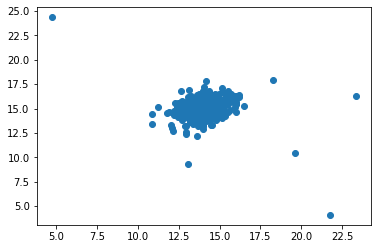

In [6]:
plt.figure()
plt.scatter(exdata[0], exdata[1])
plt.show()

In [7]:
m = len(exdata)

In [8]:
m


307

In [9]:
sum = np.sum(exdata, axis = 0)
mu = sum / m

In [10]:
sum

0    4332.453316
1    4604.297126
dtype: float64

In [11]:
mu

0    14.112226
1    14.997711
dtype: float64

In [13]:
vrsum = np.sum((exdata-mu)**2, axis = 0)

In [14]:
variance = vrsum / m

In [15]:
variance

0    1.832631
1    1.709745
dtype: float64

In [16]:
var_dia = np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [17]:
k = len(mu)
X = exdata - mu

In [18]:
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
p

0      6.470829e-02
1      5.030417e-02
2      7.245035e-02
3      5.031575e-02
4      6.368497e-02
           ...     
302    3.981340e-02
303    5.455673e-08
304    4.461721e-12
305    6.107184e-05
306    2.912867e-23
Length: 307, dtype: float64

In [19]:
cvx = pd.read_excel("./input-data/ex8data1.xlsx", sheet_name = "Xval", header = None)

In [20]:
cvx

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330
...,...,...
302,0.307938,5.391413
303,28.541786,21.599776
304,19.034988,12.028949
305,14.375779,23.355973


In [21]:
cvy = pd.read_excel("./input-data/ex8data1.xlsx", sheet_name = "y", header = None)

In [22]:
cvy

,0
0,0
1,0
2,0
3,0
4,0
...,...
302,1
303,1
304,1
305,1


In [23]:
cvyy = np.array(cvy)

In [24]:
cvyy[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [26]:
p.describe()

count    3.070000e+02
mean     5.905331e-02
std      2.324461e-02
min      1.181209e-23
25%      4.361075e-02
50%      6.510144e-02
75%      7.849532e-02
max      8.986095e-02
dtype: float64

In [28]:
def tpfpfn(ep):
    tp, fp, fn = 0,0,0
    
    for i in range(len(cvyy)):
        
        if p[i] <= ep and cvyy[i][0] == 1:
            
            tp += 1
            
        elif p[i] <= ep and cvyy[i][0] == 0:
            
            fp += 1
            
        elif p[i] < ep and cvyy[i][0] == 1:
            
            fn += 1
            
    return tp, fp, fn
            

In [29]:
eps = [i for i in p if i <= p.mean()]

In [31]:
len(eps)

133

In [32]:
def f1_calculate(ep):
    
    tp, fp, fn = tpfpfn(ep)
    
    prec = tp/(tp+fp)
    rec = tp/(tp+fn)
    
    f1 = 2*prec*rec/(prec + rec)
    
    return f1

In [33]:
f1data = []
for i in eps:
    
    f1data.append(f1_calculate(i))

In [34]:
f1data

[0.14414414414414414,
 0.14159292035398233,
 0.1951219512195122,
 0.15841584158415845,
 0.21538461538461542,
 0.4615384615384615,
 0.15517241379310345,
 0.3076923076923077,
 0.19999999999999998,
 0.6,
 0.2028985507246377,
 0.19999999999999998,
 0.3157894736842105,
 0.14678899082568805,
 0.4,
 0.1702127659574468,
 0.2033898305084746,
 0.1276595744680851,
 0.23076923076923078,
 0.2222222222222222,
 0.34285714285714286,
 0.18181818181818182,
 0.20689655172413793,
 0.2181818181818182,
 0.3243243243243243,
 0.6666666666666666,
 0.5,
 0.16666666666666669,
 0.2553191489361702,
 0.14545454545454545,
 0.14634146341463414,
 0.16,
 0.19718309859154928,
 0.21052631578947367,
 0.2608695652173913,
 0.18604651162790695,
 0.21875,
 0.140625,
 0.14285714285714288,
 0.14953271028037382,
 0.1475409836065574,
 0.23529411764705882,
 0.2926829268292683,
 0.631578947368421,
 0.27906976744186046,
 0.3870967741935484,
 0.7058823529411764,
 0.2222222222222222,
 0.18823529411764706,
 0.41379310344827586,
 0.1313

In [35]:
np.array(f1data).argmax()

126

In [39]:
e = eps[126]

In [40]:
e

5.933392126221045e-06

In [41]:
eps[np.array(f1data).argmax()]

5.933392126221045e-06

In [42]:
label = []
for i in range(len(exdata)):
    
    if p[i] <= e:
        
        label.append(1)
        
    else :
        label.append(0)

In [43]:
len(label)

307

In [44]:
exdata['label'] = np.array(label)
exdata.head()

,0,1,label
0,13.046815,14.741152,0
1,13.408520,13.763270,0
2,14.195915,15.853181,0
3,14.914701,16.174260,0
4,13.576700,14.042849,0


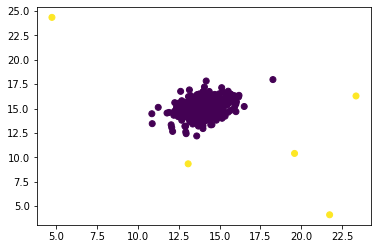

In [46]:
plt.figure()
plt.scatter(exdata[0], exdata[1], c = exdata['label'])
plt.show()